##Árboles Binarios

A lo largo de esta práctica trabajaremos con la siguiente estructura, observe lo similar que es a `Node` de Listas Enlazadas, pero en lugar de `next`, posee `left` y `right`.

In [1]:
class Tree:
    def __init__(self, cargo, left = None, right = None):
        self.cargo = cargo
        self.left = left
        self.right = right

    def __str__(self):
        return str(self.cargo)

**Ejercicio 1**: Dibuje ejemplos de árboles en su hoja con las siguientes características, construya sus ejemplos en Python

1. Un árbol con únicamente su raíz
2. Un árbol parecido a una lista de largo 3
3. Un árbol completo de altura 1
4. Un árbol vacío ¿Puede hacerlo?

In [2]:
miarbol1 = Tree(None)
miarbol2 = Tree(1, None, None)
miarbol3 = Tree(7, Tree(2), Tree(3))
miarbol4 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78))
miarbol5 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78, None, Tree(15)))

In [3]:
print(miarbol4)

45


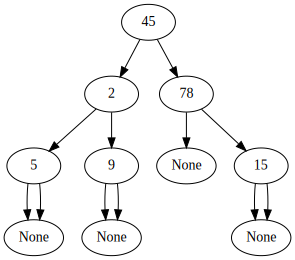

In [17]:
miarbol5.graph_tree()

**Ejercicio 2**:

Implemente en la clase Tree los siguiente métodos:

 *Ayuda: pensar que cada árbol tiene a su izquierda y derecha objetos árboles como sus hijos*.
* **nodos**: devuelve la cantidad de nodos del árbol
* **menor_mayor**: devuelve el menor y el mayor elemento del árbol en una tupla
* **buscar**: busca si un elemento está o no en el árbol
* **altura**: calcula la altura del árbol, la distancia desde la raíz hasta la hoja más lejana

In [4]:
import graphviz

class Tree:
    def __init__(self, cargo, left = None, right = None):
        self.cargo = cargo
        self.left = left
        self.right = right


    def nodos(self) -> int:  # recorre el árbol y cuenta los nodos
        if self.cargo == None:
            return "Árbol vacío"

        elif self.left is None and self.right is None:
            return 1

        elif self.left is None:
            return 1 + self.right.nodos()

        elif self.right is None:
            return 1 + self.left.nodos()

        else:
            return 1 + self.left.nodos() + self.right.nodos()


    def menor_mayor(self): #-> tuple(int, int):
        if self.left is None and self.right is None:
            return (self.cargo, self.cargo)

        elif self.left is None:
            rmin, rmax = self.right.menor_mayor()
            return (min(self.cargo, rmin), max(self.cargo, rmax))

        elif self.right is None:
            lmin, lmax = self.left.menor_mayor()
            return (min(self.cargo, lmin), max(self.cargo, lmax))

        else:
            lmin, lmax = self.left.menor_mayor()
            rmin, rmax = self.right.menor_mayor()
            return (min(self.cargo, lmin, rmin), max(self.cargo, lmax, rmax))


    def buscar(self, element: any) -> bool:
        if self.cargo == element:
            return True

        if self.left is not None:
            if self.left.buscar(element):
                return True

        if self.right is not None:
            if self.right.buscar(element):
                return True

        return False


    def altura(self) -> int:
        if self.left is None and self.right is None:
            return 0

        elif self.left is None:
            return 1 + self.right.altura()

        elif self.right is None:
            return 1 + self.left.altura()

        else:
            return 1 + max(self.left.altura(), self.right.altura())


    def graph_tree(self, dot = None):
        if dot is None:
            dot = graphviz.Digraph(comment='Binary Tree')

        # Agregar el nodo actual al gráfico
        dot.node(str(self.cargo))

        # Agregar nodos para los hijos izquierdo y derecho (si existen)
        if self.left:
            dot.edge(str(self.cargo), str(self.left.cargo))
            self.left.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')

        if self.right:
            dot.edge(str(self.cargo), str(self.right.cargo))
            self.right.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')

        return dot

In [6]:
miarbol1 = Tree(None)
miarbol2 = Tree(1, None, None)
miarbol3 = Tree(7, Tree(2), Tree(3))
miarbol4 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78))
miarbol5 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78, None, Tree(15)))

In [7]:
miarbol5.nodos()

6

In [ ]:
miarbol4.buscar(9)

True

In [ ]:
miarbol4.altura()

2

In [ ]:
miarbol5.menor_mayor()

(2, 78)

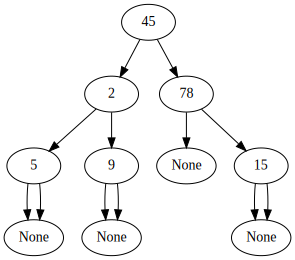

In [8]:
miarbol5.graph_tree()

**Ejercicio 3**:

a. Pensar y dibujar un ejemplo de árbol en papel, escribir los resultados de PreOrder, InOrder y PostOrder

b. Implementar los recorridos PreOrder, InOrder y PostOrder como funciones recursivas, verificar sus resultados

c. Implementar los recorridos PreOrder, InOrder y PostOrder como funciones iterativas, verificar sus resultados

_Ayuda_: Para las versiones iterativas, necesitará utilizar una Pila como estructura de datos adicional. Puede importar una implementacion cualquiera de Pila que haya realizado en la Practica anterior.

In [9]:
# 3.b)

import graphviz

class Tree:
    def __init__(self, cargo, left = None, right = None):
        self.cargo = cargo
        self.left = left
        self.right = right


    def printTreePreOrder(self):
        if self is None:
            return
        print(self.cargo)
        if self.left is not None:
            self.left.printTreePreOrder()
        if self.right is not None:
            self.right.printTreePreOrder()


    def printTreeInOrder(self):
        if self is None:
            return
        if self.left is not None:
            self.left.printTreeInOrder()
        print(self.cargo)
        if self.right is not None:
            self.right.printTreeInOrder()


    def printTreePostOrder(self):
        if self is None:
            return
        if self.left is not None:
            self.left.printTreePostOrder()
        if self.right is not None:
            self.right.printTreePostOrder()
        print(self.cargo)


    def graph_tree(self, dot = None):
        if dot is None:
            dot = graphviz.Digraph(comment='Binary Tree')

        # Agregar el nodo actual al gráfico
        dot.node(str(self.cargo))

        # Agregar nodos para los hijos izquierdo y derecho (si existen)
        if self.left:
            dot.edge(str(self.cargo), str(self.left.cargo))
            self.left.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')

        if self.right:
            dot.edge(str(self.cargo), str(self.right.cargo))
            self.right.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')

        return dot

In [10]:
miarbol1 = Tree(None)
miarbol2 = Tree(1, None, None)
miarbol3 = Tree(7, Tree(2), Tree(3))
miarbol4 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78))
miarbol5 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78, None, Tree(15)))

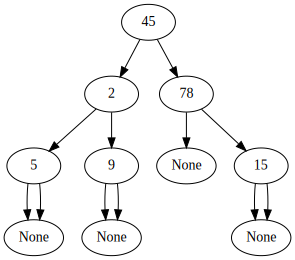

In [11]:
miarbol5.graph_tree()

In [12]:
miarbol5.printTreePreOrder()

45
2
5
9
78
15


In [ ]:
miarbol5.printTreeInOrder()

5
2
9
45
78
15


In [ ]:
miarbol5.printTreePostOrder()

5
9
2
15
78
45


In [ ]:
# 3.c)

def treePreOrder(tree: Tree | None) -> None:
  pila = [tree]
  while pila != []:
    t = pila.pop()

    if t is None:
        continue

    if isinstance(t, Tree):
        print(t.cargo)
        pila.append(t.right) #primero derecha porque la pila es fifo
        pila.append(t.cargo)
        pila.append(t.left)
        #cambiando el lugar de cargo cambia el orden
        #postorden cargo arriba
    else:
        print(t)


def treeInOrder(tree: Tree | None) -> None:
  pass

def treePostOrder(tree: Tree | None) -> None:
  pass

In [ ]:
#otra forma
def treePreOrder(tree: Tree | None) -> None:
  pila = [tree]
  while pila != []:
    t = pila.pop()

    if t is None:
        continue

    if not isinstance(t, Tree):
        print(t)
        continue

        pila.append(t.right) #primero derecha porque la pila es fifo
        pila.append(t.cargo)
        pila.append(t.left)
        #cambiando el lugar de cargo cambia el orden
        #postorden cargo arriba
    else:
        print(t.cargo)

**Ejercicio 4** Escriba una funcion `copiar` que reciba un árbol y devuelva un _nuevo_ árbol idéntico al original.

##Árboles Binarios de Búsqueda

**Ejercicio 5**: Dibuje un árbol binario de búsqueda de palabras, con al menos 5 palabras, utilizando orden de diccionario (lexicográfico). Acomódelo como más le guste, mientras sea correcto. Luego indique en qué lugar del árbol se insertaría la palabra `python`.

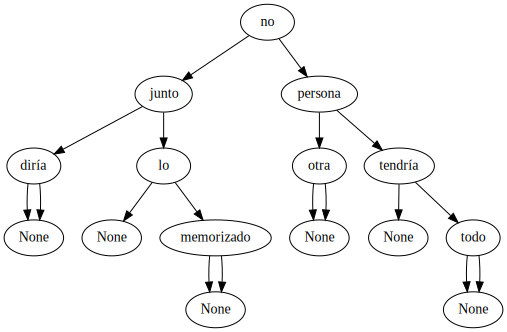

In [ ]:
# "Otra persona no diría todo junto lo tendría memorizado"

miarbol6 = Tree("no", Tree("junto", Tree("diría"), Tree("lo", None, Tree("memorizado"))), Tree("persona", Tree("otra"), Tree("tendría", None, Tree("todo"))))
miarbol6.graph_tree()

**Ejercicio 6**: Utilizando la misma clase Tree de la sección anterior, implemente otra clase llamada BSTree que herede de esta, reimplemente los métodos **menor_mayor**, **buscar** e implemente un nuevo método llamado **insertar** que inserte un elemento.

_Ayuda: puede optar por definir métodos menor y mayor **internamente** por separado para hacer la implementación más sencilla, pero no es estrictamente necesario._

In [ ]:
class BSTree(Tree):

    def menor_mayor(self): #-> tuple(int, int):
        if self.left is None and self.right is None:
            return (self.cargo, self.cargo)

        elif self.left is None:
            rmin, rmax = self.right.menor_mayor()
            return (min(self.cargo, rmin), max(self.cargo, rmax))

        elif self.right is None:
            lmin, lmax = self.left.menor_mayor()
            return (min(self.cargo, lmin), max(self.cargo, lmax))

        else:
            lmin, lmax = self.left.menor_mayor()
            rmin, rmax = self.right.menor_mayor()
            return (min(self.cargo, lmin, rmin), max(self.cargo, lmax, rmax))


    def buscar(self, element: any) -> bool:
        if self.cargo == element:
            return True

        elif element < self.cargo:
            if self.left is not None:
                return self.left.buscar(element)

        else:
            if self.right is not None:
                return self.right.buscar(element)

        return False


    def insertar(self, dato):

        if dato == self.cargo:
            print("El elemento ya existe")

        elif dato < self.cargo:
            if self.left is None:
                self.left = BSTree(dato)
            else:
                self.left.insertar(dato)

        elif dato > self.cargo:
            if self.right is None:
                self.right = BSTree(dato)
            else:
                self.right.insertar(dato)


    # Crear un árbol binario de búsqueda desde una lista
    # def createBST(list):     #preguntar
    #     BSTree = None
    #     while (list != []):
    #         cargo = list.pop()
    #         BSTree = insertar(cargo, BSTree)
    #     return BSTree

In [ ]:
miarbol7 = BSTree("no", BSTree("junto", BSTree("diría"), BSTree("lo", None, BSTree("memorizado"))), \
                  BSTree("persona", BSTree("otra"), BSTree("tendría", None, BSTree("todo"))))
#miarbol7.graph_tree()
miarbol7.buscar("memorizado")

True

In [ ]:
miarbol7.printTreeInOrder()

diría
junto
lo
memorizado
no
otra
persona
tendría
todo


In [ ]:
#miarbol7.insertar("python")
#miarbol7.insertar("zzz")
miarbol7.insertar("arbol")
#miarbol7.insertar("r")

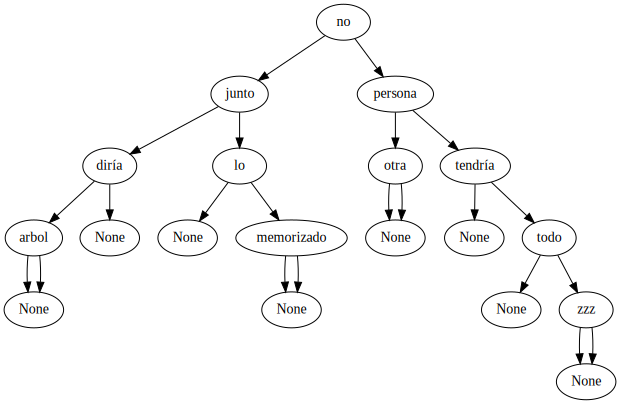

In [ ]:
miarbol7.graph_tree()

In [ ]:
miarbol7.menor_mayor()

('diría', 'zzz')

**Ejercicio 7**:

La [magia de IPython](https://ipython.readthedocs.io/en/stable/interactive/magics.html) es un sistema de comandos mágicos que sirven para realizar diversas tareas del sistema operativo directamente en un entorno que use a iPython, como Google Colab, IPython, Jupyter Notebooks, etc.

Uno de estos comandos magicos es `%%timeit`, el cual sirve para medir cuando tiempo tarda en ejecutarse un bloque de codigo. Este comando corre las celdas muchas veces y calcula el tiempo promedio de ejecucion, para asegurarse de que la medicion sea confiable.

En la siguientes dos celdas de código se realizan dos experimentos:

1. Por un lado, se insertan los numeros del 1 al 100 en un BSTree en orden creciente, y luego, se chequea si cada uno esta en el árbol.
2. En otra celda, se insertan los numeros del 1 al 100 en un BSTree en orden aleatorio, y luego, se chequea si cada uno esta en el árbol.

Corra los experimentos utilizando Google Colab o IPython y explique porque uno de los dos tarda menos que el otro.

Extensible system of ‘magic’ commands for controlling the environment and performing many tasks related to IPython or the operating system.

In [ ]:
%%timeit

# Pruebas de 1

In [ ]:
%%timeit

# Pruebas de 2

**Ejercicio 8**: Escriba una funcion `combinar` que combine dos arboles binarios de búsqueda en uno solo. El resultado tambien debe ser un arbol binario de busqueda.

_Ayuda: quizás resulte conveniente implementar una función de copia pero para BSTree_

**Ejercicio 9** Escriba una función `borrar_raiz`. Dado un arbol binario de busqueda, esta funcion deberia devolver un nuevo arbol binario de busqueda que contenga los mismos datos, a excepcion de la raiz.

**Ejercicio 10** Escriba una funcion `borrar_valor` que dado un arbol binario de busqueda y un valor, devuelva un arbol binario de busqueda sin ese valor.

# Ejercicios Adicionales

**Ejercicio 11**: En la práctica anterior mencionamos cómo utilizamos notación postfija de expresiones para evaluar en un Stack y sin usar paréntesis. Con árboles podemos representar expresiones infijas sin paréntesis. Cada nodo interno del árbol representa un operador, izquierda y derecha son subexpresiones, y las hojas son números. Implementar una clase Expression que herede de Tree, un árbol de expresiones infijas, con dos métodos.

* **imprimir**: que imprime la expresión de forma infija con paréntesis.
* **evaluar**: evalúa todo el árbol y lo reduce a un número.

Ejemplo
```
     *
   /   \
  +     -     ==>   ((1 + 2) * (3 - 4))   ==>   -2
 / \   / \
1   2 3   4
```

**Ejercicio 12**: Herede de BSTree una clase Diccionario, cuyos valores sean tuplas (clave, valor). Reimplemente los métodos **buscar** e **insertar** para que acepten estas tuplas, guarden de acuerdo a sus claves que son strings, y busquen el valor asociado a la clave pasada como argumento, como un diccionario.